# Import STRIFE code and default arguments

In [1]:
from STRIFE import STRIFE #STRIFE module
from parse_args import parse_args #Get all of the default arguments for STRIFE

from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole


In [2]:
%config Completer.use_jedi = False
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/data/hookbill/hadfield/CSD/Python_API_2021/miniconda/envs/STRIFE_clone/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
args = parse_args()

# Set arguments to run STRIFE

To run STRIFE, we need to specify a few key arguments. You can find a full list of the arguments (and a brief comment on what each of them does) either by opening the ```parse_args.py``` file, or by running ```python STRIFE.py --help``` in the command line.

In this notebook, we're going to show how user-specified pharmacophoric points can be provided to STRIFE. We've already specified the pharmacophoric points using the ```data_prep/do_manual_pharm_specification.sh``` script (and they are saved in the ```example_custom_pharms/STRIFE_1q8t``` directory).

### Arguments we need to specify:

```protein```: The path to a pdb file which contains our protein of interest - the PDB file needs to prepared so that it can be used by GOLD to dock ligands. More information can be found [here](https://www.ccdc.cam.ac.uk/support-and-resources/ccdcresources/GOLD_User_Guide.pdf), but generally, you need to remove any ligands and waters and ensure that the protein has been protonated.


Specifying the fragment of interest:

There are two ways to tell STRIFE which fragment to elaborate (and which exit vector you want to make elaborations from).

* Use the ```fragment_SDF``` argument to specify the structure of the fragment you want to elaborate. This must be a bound fragment that fits in the ```protein``` binding site. We also have to specify an ```exit_vector_idx``` - this is the index of the atom that the elaborations will be generated from. We have written a script ```specifyExitVector.py``` (see the README for more info) that you can use to help you identify the index of the atom you want to elaborate from

* Alternatively, we can specify a ```fragment_SDF``` and ```fragment_smiles```. ```fragment_smiles``` is a SMILES string of the desired fragment, where the exit vector is denoted by a dummy atom (again ```specifyExitVector.py``` can help you obtain this SMILES string). You can provide either the raw string as an argument, or a file in which the SMILES string is saved.

Storing the output:

* Specify the directory you would like to store the output in as ```output_directory``` - if the directory doesn't already exist then it will be created.




In [4]:
#Required arguments
args.protein = 'example_custom_pharms/1q8t_protein.pdb' 
args.fragment_sdf = 'example_custom_pharms/1q8t_frag.sdf'
args.fragment_smiles = 'example_custom_pharms/1q8t_frag_smiles.smi'
args.output_directory = 'example_custom_pharms/STRIFE_1q8t' #When using user-specified pharmacophoric points, this directory must already contain
                                                            #a donorHotspot.sdf or acceptorHotspot.sdf file (or both)

#Extra arguments for user-specified pharmacophoric points run
args.load_specified_pharms = True
args.model_type = 1

#Other arguments
args.num_cpu_cores = 7
args.write_elaborations_dataset = True

# Running STRIFE

In [5]:
#Create the STRIFE class
STRIFE_model = STRIFE(args)

Running STRIFE Algorithm....
Doing argument checking...
Argument checking complete.
Processing pharmacophoric information
Preprocessing fragment


In [6]:
#Run STRIFE
STRIFE_model.run(args)

W0308 12:05:01.421705 140584540915520 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



4 [0, 0, 1, 1, 0] CC([NH3+])C1CCC(CC1)C(=O)N[*:1]
reading data...
Loading data from /tmp/tmpvqax_qs0/targetJsonCount.json
Loading data from /tmp/tmpvqax_qs0/targetJsonCount.json


W0308 12:05:02.900439 140584540915520 deprecation.py:323] From /data/hookbill/hadfield/production/STRIFE/coarseGrainedGenModel.py:210: GRUCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is equivalent as tf.keras.layers.GRUCell, and will be replaced by that in Tensorflow 2.0.
W0308 12:05:02.901383 140584540915520 module_wrapper.py:139] From /data/hookbill/hadfield/production/STRIFE/coarseGrainedGenModel.py:211: The name tf.nn.rnn_cell.DropoutWrapper is deprecated. Please use tf.compat.v1.nn.rnn_cell.DropoutWrapper instead.

W0308 12:05:03.078952 140584540915520 deprecation.py:323] From /data/hookbill/hadfield/CSD/Python_API_2021/miniconda/envs/STRIFE_clone/lib/python3.7/site-packages/tensorflow_core/python/ops/rnn_cell_impl.py:559: Layer.add_variable (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please 

Restoring weights from file models/coarseGrainedGenModel_saved.pickle.
Generation done
Number of generated SMILES: 250
Processed: 05 [0, 0, 1, 1, 0] CC([NH3+])C1CCC(CC1)C(=O)N[*:1]
reading data...
Loading data from /tmp/tmphuloj6h6/targetJsonCount.json
Loading data from /tmp/tmphuloj6h6/targetJsonCount.json
Restoring weights from file models/coarseGrainedGenModel_saved.pickle.
Generation done
Number of generated SMILES: 250
Processed: 06 [0, 0, 1, 1, 0] CC([NH3+])C1CCC(CC1)C(=O)N[*:1]
reading data...
Loading data from /tmp/tmpmvbbr5pa/targetJsonCount.json
Loading data from /tmp/tmpmvbbr5pa/targetJsonCount.json
Restoring weights from file models/coarseGrainedGenModel_saved.pickle.
Generation done
Number of generated SMILES: 250
Processed: 06 [0, 0, 1, 1, 1] CC([NH3+])C1CCC(CC1)C(=O)N[*:1]
reading data...
Loading data from /tmp/tmppxwzxngn/targetJsonCount.json
Loading data from /tmp/tmppxwzxngn/targetJsonCount.json
Restoring weights from file models/coarseGrainedGenModel_saved.pickle.
Ge

W0308 12:20:15.151684 140584540915520 module_wrapper.py:139] From /data/hookbill/hadfield/production/STRIFE/fineGrainedGenModel.py:125: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0308 12:20:15.161767 140584540915520 module_wrapper.py:139] From /data/hookbill/hadfield/production/STRIFE/fineGrainedGenModel.py:198: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.



reading data...
Loading data from /tmp/tmpcoj1nd_h/pharmElabsJsonPharm.json
Loading data from /tmp/tmpcoj1nd_h/pharmElabsJsonPharm.json
Restoring weights from file models/fineGrainedGenModel_saved.pickle.
Generation done
Number of generated SMILES: 250
reading data...
Loading data from /tmp/tmpxk39zj5g/pharmElabsJsonPharm.json
Loading data from /tmp/tmpxk39zj5g/pharmElabsJsonPharm.json
Restoring weights from file models/fineGrainedGenModel_saved.pickle.
Generation done
Number of generated SMILES: 250
reading data...
Loading data from /tmp/tmpsefv49qb/pharmElabsJsonPharm.json
Loading data from /tmp/tmpsefv49qb/pharmElabsJsonPharm.json
Restoring weights from file models/fineGrainedGenModel_saved.pickle.
Generation done
Number of generated SMILES: 250
reading data...
Loading data from /tmp/tmpda2elxly/pharmElabsJsonPharm.json
Loading data from /tmp/tmpda2elxly/pharmElabsJsonPharm.json
Restoring weights from file models/fineGrainedGenModel_saved.pickle.
Generation done
Number of generated 

# View the generated elaborations

In [7]:
ranked_elabs = STRIFE_model.pharmElabsTestMultiLigEff
ranked_elabs.head(10)

,smiles,ligEfficiency
231,CC([NH3+])C1CCC(C(=O)NC2CCCC2)CC1,3.364494
30,CNCCCCNC(=O)C1CCC(C(C)[NH3+])CC1,3.348956
195,CCNCCCNC(=O)C1CCC(C(C)[NH3+])CC1,3.332256
77,CC([NH3+])C1CCC(C(=O)NC2CCCC2)CC1,3.299006
227,CCCCCNC(=O)C1CCC(C(C)[NH3+])CC1,3.260759
36,CC([NH3+])C1CCC(C(=O)NCC(C)(C)O)CC1,3.257506
202,CCCCCNC(=O)C1CCC(C(C)[NH3+])CC1,3.231088
27,CCCCCNC(=O)C1CCC(C(C)[NH3+])CC1,3.227106
17,CCCCCNC(=O)C1CCC(C(C)[NH3+])CC1,3.211053
174,CCCCCNC(=O)C1CCC(C(C)[NH3+])CC1,3.198247


### Now let's visualise the most highly ranked elaborations

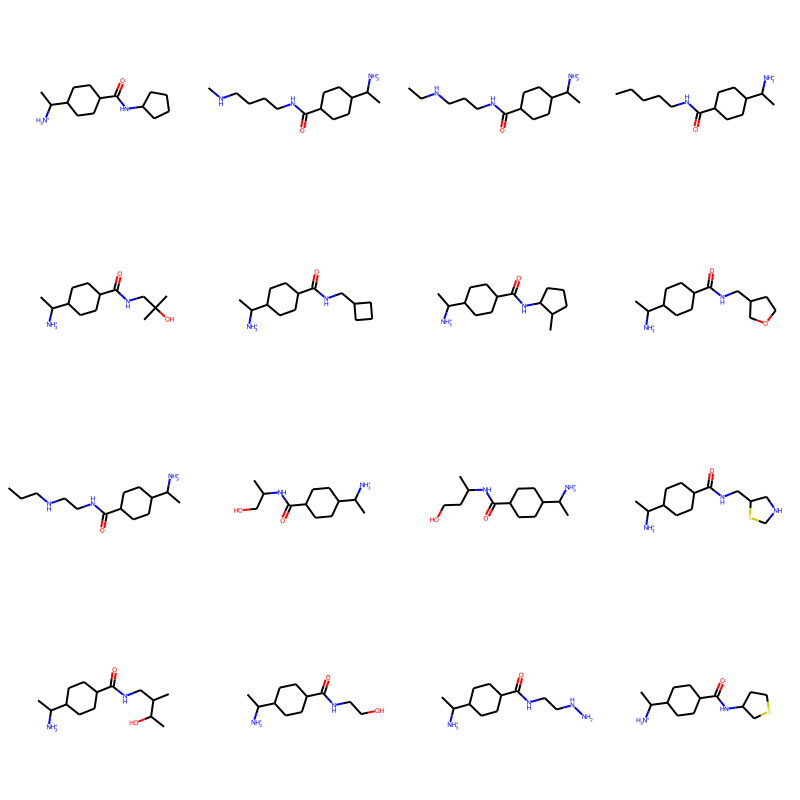

In [8]:
Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(s) for s in ranked_elabs['smiles'].drop_duplicates().head(16)], molsPerRow = 4)

Note that, in this instance, the majority of the most highly ranked molecules do not exhibit an elaboration containing one HBA and one HBD. Whilst each of the quasi-actives yielded a fine-grained pharmacophoric profile containing one HBA and one HBD, the generative molecule is not forced to generate molecules with such profiles and molecules with other pharmacophoric profiles attained better predicted ligand efficiency.

This is not surprising behaviour, as the pharmacophoric points we used were specified arbitrarily to demonstrate how a user can specify their own pharmacophoric points.

If we want to, we can view the quasi actives which determined the pharmacophoric profiles used in the refinement phase:

In [9]:
#We can view basic information about each pharmacophoric point

for k in STRIFE_model.hMulti.keys():
    
    print(f'****Pharmacophoric point: {k}****')
    for kk in STRIFE_model.hMulti[k].keys():
        print(f'{kk} : {STRIFE_model.hMulti[k][kk]}')
    
    print('\n')
    

****Pharmacophoric point: 0****
type : Acceptor
position : [ 2.675 10.168  3.463]
distFromExit : 4.55521678957215
angFromExit : 0.3618600157404793


****Pharmacophoric point: 1****
type : Donor
position : [4.675 8.168 4.463]
distFromExit : 2.958039891549808
angFromExit : 0.16637923386536377




In [10]:
STRIFE_model.multiQuasiActives

,smiles,distance
77,CC([NH3+])C1CCC(C(=O)NCCNC=O)CC1,1.001311
149,CC(=O)NCCNC(=O)C1CCC(C(C)[NH3+])CC1,1.404241
139,CC(O)CC(C)NC(=O)C1CCC(C(C)[NH3+])CC1,1.828472
230,CC([NH3+])C1CCC(C(=O)NCc2cccc(O)c2)CC1,1.863027
90,CNC(=O)CNC(=O)C1CCC(C(C)[NH3+])CC1,1.870882


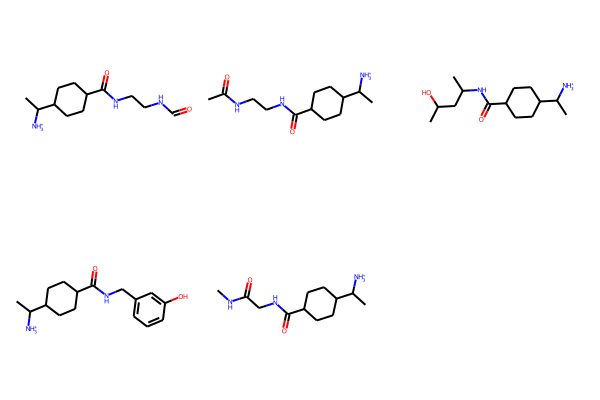

In [11]:
Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(s) for s in STRIFE_model.multiQuasiActives['smiles']])

### Accessing the docked poses

STRIFE saves the docked poses in the ```output_directory``` under the name ```pharmsElabsTestDocked.sdf```. You can view them in the binding pocket using a molecule viewer such as PyMol

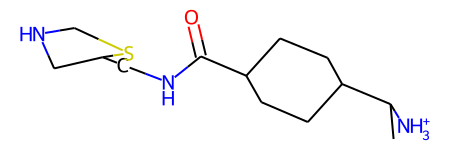

In [12]:
docked_mols = Chem.SDMolSupplier(f'{args.output_directory}/pharmsElabsTestMultiDocked.sdf')
docked_mols[0] #A 2D depiction of one of the docked mols